# Economics Analysis of Employment in Chicago

## Importing the Data

In [11]:
import pandas as pd

df = pd.read_csv("chicago_employee_dataset.csv")
df

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"GARCIA, CHRISTOPHER A",CLERK - BD OF ELECTIONS,BOARD OF ELECTION COMMISSIONERS,F,SALARY,NaN,34176.0,NaN
1,"ASHFORD, MARQUISHA D",INQUIRY AIDE III,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,46056.0,NaN
2,"MATHIS, DESIREE",PERSONNEL ASSISTANT,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,70608.0,NaN
3,"GRAY, DERYL R",ALDERMANIC AIDE,CITY COUNCIL,P,HOURLY,20.0,NaN,25.0
4,"MACK, QIANA S",LEAVE OF ABSENCE ADMIN,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,66684.0,NaN
...,...,...,...,...,...,...,...,...
32488,"COOGAN, PATRICK M",LIEUTENANT-EMT,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,135144.0,NaN
32489,"MOBLEY, JEANETTE",FOSTER GRANDPARENT,DEPARTMENT OF FAMILY AND SUPPORT SERVICES,P,HOURLY,20.0,NaN,4.0
32490,"DE LA ROSA, JOSEPH",FIRE ENGINEER-EMT,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,118830.0,NaN
32491,"GRADILLA, IVON",SUPERVISING TRAFFIC CONTROL AIDE,OFFICE OF EMERGENCY MANAGEMENT AND COMMUNICATIONS,F,SALARY,NaN,74844.0,NaN


## Descriptive Statistics

<Axes: ylabel='Frequency'>

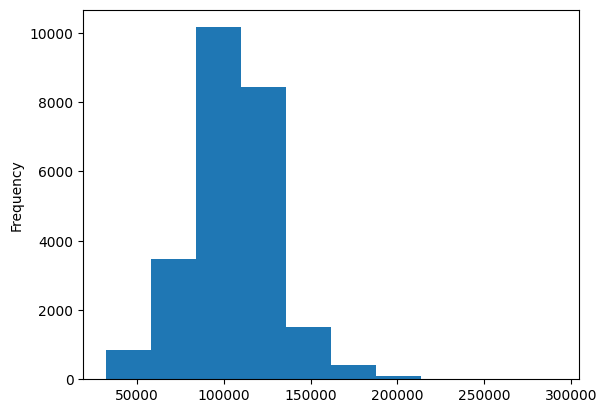

In [17]:
df["Annual Salary"].plot.hist()

Comparing Salary to Hourly via boxplots

In [12]:
#Created a column for hourly to salary
df["Hourly to Salary"] = df["Typical Hours"] * df["Hourly Rate"] * 52
df

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,Hourly to Salary
0,"GARCIA, CHRISTOPHER A",CLERK - BD OF ELECTIONS,BOARD OF ELECTION COMMISSIONERS,F,SALARY,NaN,34176.0,NaN,NaN
1,"ASHFORD, MARQUISHA D",INQUIRY AIDE III,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,46056.0,NaN,NaN
2,"MATHIS, DESIREE",PERSONNEL ASSISTANT,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,70608.0,NaN,NaN
3,"GRAY, DERYL R",ALDERMANIC AIDE,CITY COUNCIL,P,HOURLY,20.0,NaN,25.0,26000.0
4,"MACK, QIANA S",LEAVE OF ABSENCE ADMIN,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,66684.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32488,"COOGAN, PATRICK M",LIEUTENANT-EMT,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,135144.0,NaN,NaN
32489,"MOBLEY, JEANETTE",FOSTER GRANDPARENT,DEPARTMENT OF FAMILY AND SUPPORT SERVICES,P,HOURLY,20.0,NaN,4.0,4160.0
32490,"DE LA ROSA, JOSEPH",FIRE ENGINEER-EMT,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,118830.0,NaN,NaN
32491,"GRADILLA, IVON",SUPERVISING TRAFFIC CONTROL AIDE,OFFICE OF EMERGENCY MANAGEMENT AND COMMUNICATIONS,F,SALARY,NaN,74844.0,NaN,NaN


<Axes: >

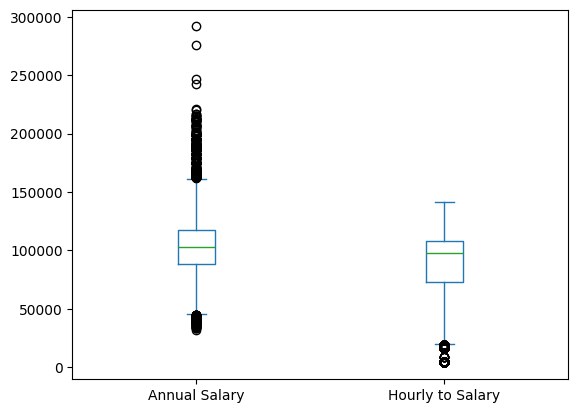

In [16]:
df[["Annual Salary", "Hourly to Salary"]].plot.box()

We can see that there are many outliers for annual salary. Let's take a deeper look into this

Find amount of outliers in salary dataset
- Find q1 and q3
- High Outlier > Q3 + (1.5 * IQR)
- Low Outlier < Q3 - (1.5 * IQR)

In [31]:
q1 = df["Annual Salary"].quantile(0.25)
q3 = df["Annual Salary"].quantile(0.75)
IQR = q3 - q1
h_outlier = q3 + (1.5 * IQR)
l_outlier = q1 - (1.5 * IQR)

print(h_outlier)
print(l_outlier)

161361.0
45177.0


As we calculated here, the smallest amount an annual salary can be without being considered an outlier is $45,177 and the largest amount it can be is $161,361. Next let's use these boundaries to find the amount of outliers. 

In [35]:
df_salary_outliers = df[(df["Annual Salary"] > h_outlier) | (df["Annual Salary"] < l_outlier)]
df_salary_outliers

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,Hourly to Salary
0,"GARCIA, CHRISTOPHER A",CLERK - BD OF ELECTIONS,BOARD OF ELECTION COMMISSIONERS,F,SALARY,NaN,34176.0,NaN,NaN
5,"GUZMAN, MELISSA M",CLERK - BD OF ELECTIONS,BOARD OF ELECTION COMMISSIONERS,F,SALARY,NaN,40620.0,NaN,NaN
32,"TOLLINCHI, JUDITH",CLERK - BD OF ELECTIONS,BOARD OF ELECTION COMMISSIONERS,F,SALARY,NaN,43728.0,NaN,NaN
33,"GALLARDO, ANGELA",CLERK - BD OF ELECTIONS,BOARD OF ELECTION COMMISSIONERS,F,SALARY,NaN,43728.0,NaN,NaN
34,"EBERHART, MARKESA I",ELECTION EQUIPMENT & SUPPLY SPEC I,BOARD OF ELECTION COMMISSIONERS,F,SALARY,NaN,40620.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32376,"FLEISCHHACKER, T P",BATTALION CHIEF - EMT,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,165858.0,NaN,NaN
32418,"CRONIN, JOHN J",BATTALION CHIEF - EMT,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,165858.0,NaN,NaN
32433,"FLYNN, DANIEL G",BATTALION CHIEF - EMT,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,165858.0,NaN,NaN
32437,"FOX, JOHN W",BATTALION CHIEF - EMT,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,165858.0,NaN,NaN


In [ ]:
#df_salary_outliers["Annual Salary"].plot(kind="hist", title="Outliers in Annual Salary")

## Economic Visualization

Find which department has the largest salaries

In [41]:
df.groupby("Department").agg("count").reset_index()

,Department,Name,Job Titles,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,Hourly to Salary
0,BOARD OF ELECTION COMMISSIONERS,106,106,106,106,0,106,0,0
1,BOARD OF ETHICS,6,6,6,6,0,6,0,0
2,CHICAGO ANIMAL CARE AND CONTROL,69,69,69,69,6,63,6,6
3,CHICAGO COMMISSION ON HUMAN RELATIONS,19,19,19,19,0,19,0,0
4,CHICAGO DEPARTMENT OF AVIATION,2163,2163,2163,2163,1287,876,1287,1287
5,CHICAGO DEPARTMENT OF PUBLIC HEALTH,759,759,759,759,4,755,4,4
6,CHICAGO DEPARTMENT OF TRANSPORTATION,1344,1344,1344,1344,948,396,948,948
7,CHICAGO FIRE DEPARTMENT,4808,4808,4808,4808,0,4808,0,0
8,CHICAGO POLICE BOARD,2,2,2,2,0,2,0,0
9,CHICAGO POLICE DEPARTMENT,12309,12309,12309,12309,41,12268,41,41
